# Predykcja ataku phishingowego w wiadomości <b>e-mail</b> za pomocą <b><i>nadzorowanego nauczania maszynowego</i></b>
Dataset: 
<ul>
    <li>WSTAWIĆNAZWE</li>
    <ul>
        <li>WSTAWIĆURL</li>
    </ul>
</ul>

### Pobieranie niezbędnych modułów
<ul>
    <li> pandas - praca z <i>Data Framami</i></li>
    <li> numpy - obliczenia</li>
    <li> matplotlib.pyplot - wizualizacja</li>
    <li> sklearn - wszelakie narzędzia do <i>Machine Learningu</i></li>
</ul>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Wczytanie uprzednio przygotowanego Data Framu

In [2]:
learning_set = pd.read_csv('ML_DataFrame.csv')
print(learning_set.head())

Unnamed: 0  label  urls_count  protocol  contains_ip  url_length  \
0           0    1.0         1.0       0.0          0.0        21.0   
1           1    1.0         1.0       0.0          0.0        25.0   
2           2    1.0         3.0       0.0          0.0        68.0   
3           3    0.0         3.0       0.0          0.0        14.0   
4           4    1.0         1.0       0.0          0.0       136.0   

   TLD_alpha  subdomain_level  slash_count  dots_count  hyphens_count  \
0        1.0              0.0          3.0         1.0            0.0   
1        1.0              1.0          2.0         2.0            0.0   
2        1.0              1.0          6.0         4.0            0.0   
3        1.0              1.0          0.0         2.0            0.0   
4        1.0              2.0          4.0         4.0            2.0   

   has_non_latin  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


In [3]:
print(learning_set.isna().sum())
# TODO: naprawić NaN w subdomain level
learning_set.dropna(inplace=True)

Unnamed: 0           0
label                0
urls_count           0
protocol             0
contains_ip          0
url_length           0
TLD_alpha            0
subdomain_level    590
slash_count          0
dots_count           0
hyphens_count        0
has_non_latin        0
dtype: int64


### Wybieranie X i y
X:
<ul>
<li> urls_count </li>
<li>protocol </li>
<li> contains_ip </li>
<li> url_length </li>
<li> TLD_alpha </li>
<li> subdomain_level </li>
<li> slash_count </li>
<li> dots_count </li>
<li> hyphens_count </li>
<li> has_non_latin </li>
</ul>
y:
<ul>
    <li> label </li>
</ul>

In [4]:
X = learning_set.loc[:, 'urls_count':'has_non_latin'].values
y = learning_set.loc[: , 'label'].values
print(X.shape, y.shape)

(41126, 10) (41126,)


### Rozdzielanie X, y na treningowe i testowe zestawy

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32900, 10) (8226, 10) (32900,) (8226,)


### Szukanie najlepszego <b> n </b> dla <i>KNeighborsClassifier</i>


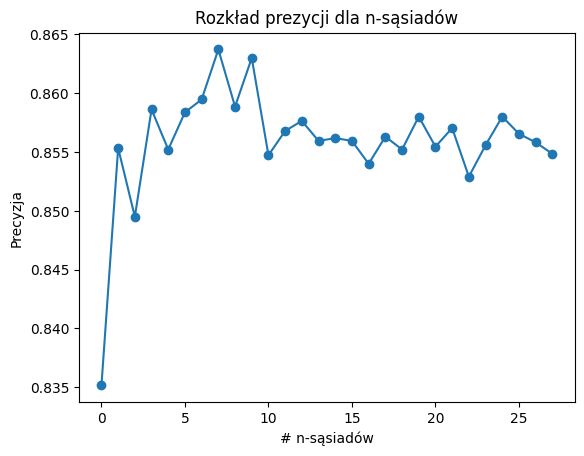

In [12]:
# Nauczanie
n_range = range(2, 30)
scores = []
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

# Wizualizacja
fig, ax = plt.subplots()
values = scores
labels = n_range
ax.plot(values, marker='o')
ax.set_xlabel('# n-sąsiadów')
#ax.set_xticks(n_range) #naprawic oś X
ax.set_ylabel('Precyzja')
ax.set_title('Rozkład prezycji dla n-sąsiadów')

plt.show()

### Szukanie najlepszego modelu

In [8]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=8),
}

results = []
for model in models.values():
    kf = KFold(n_splits=6, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(score)


### Walidacja wybranych modeli

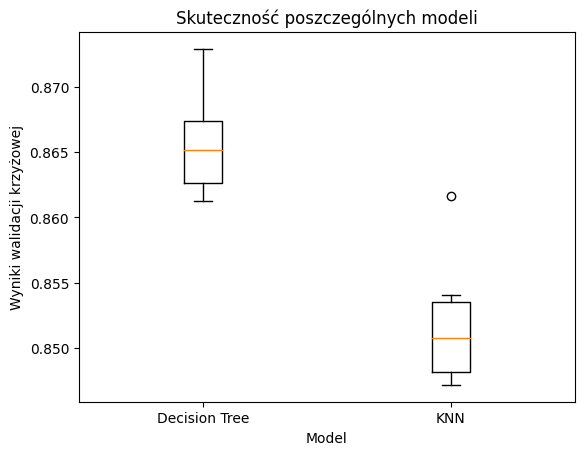

In [9]:
fig, ax = plt.subplots()

ax.boxplot(results, labels=models.keys())
ax.set_title('Skuteczność poszczególnych modeli')
ax.set_xlabel('Model')
ax.set_ylabel('Wyniki walidacji krzyżowej')
plt.show()

### Nauczanie najskuteczniejszego modelu
Najlepszy okazał się <b><i>DecisionTreeClassifier</i></b>
<ul>
    <li>Accuracy ~0.866 (std. ~[TU WSTAWIĆ])</li>
</ul>

In [10]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Walidacja modelu

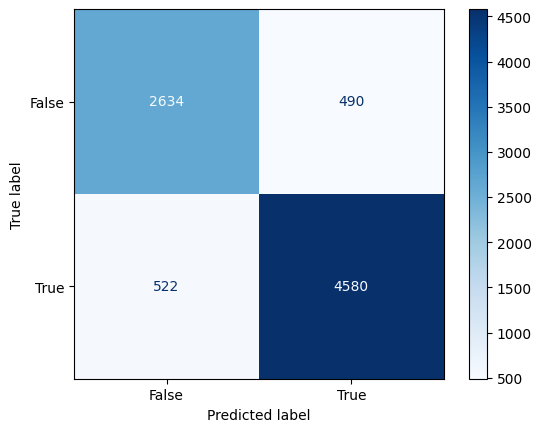

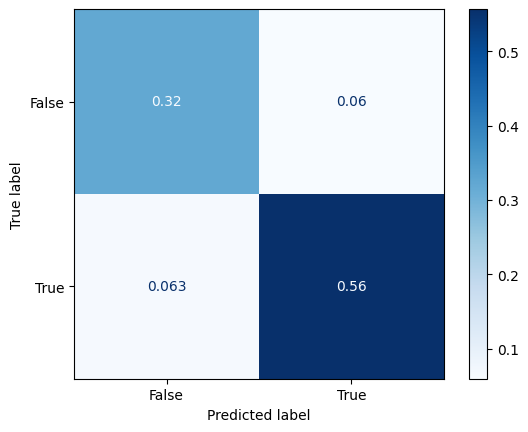

In [11]:
y_pred = tree.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot(cmap='Blues')
plt.show()

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix/np.sum(confusion_matrix),
    display_labels=[False, True])
    
cm_display.plot(cmap='Blues')
plt.show()

# Rezultat projektu
Przy pomocy <b><i>DecisionTreeClassifier</i></b> udało się wytrenować model z wynikami:
<ul>
    <li> (accuracy) ~     </li>   
    <li> (recall) ~       </li>
</ul>